<hr /> 

## Machine Learning Marathon parte 2


> Desafio inspirado em trabalho para disciplina de Aprendizagem de Máquina do curso de Especialização em Inteligência Artificial Aplicada da Universidade Federal do Paraná (UFPR) 2021


<hr /> 


### Objetivo do desafio

Para os datasets:

- Câncer de mama;
- Veículo;
- Previsão do tempo;
- Imposto de Renda
- Diabetes;
- Banco;

Treinar os seguintes modelos de classificação:

- Rede Neural Artificial (com Hold out, cross validation e grid search)
- K-Nearest Neighboors
- Support Vector Machine (Com hold out, cross validation e grid search)
- Random Forest (com hold out, cross validation e grid search)

Apresentando em uma tabela, todos os valores para:

- Parâmetros do modelo;
- Acurácia do modelo;
- Matriz de confusão.

- Deve-se apresentar uma tabela de modelos para cada dataset;

<br />

<hr />

<br />

-> Resultados ao final do arquivo

In [106]:
# Modulos e bibliotecas necessários

# Visualização
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modelos
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Métricas
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

# Opta por utilziar a visualização linda do seaborn <3
plt.style.use('seaborn')

In [2]:
# Define os caminhos para os arquivos de dados em um dicionário
files = {
    'cancer': 'datasets/breast_cancer/Material 02 - 2 - Cancer de Mama - Dados.csv',
    'veiculo': 'datasets/veiculos/Material 02 - 5 - C - Veiculos - Dados.csv',
    'previsao_tempo': 'datasets/previsao_do_tempo/Material 02 - 6 - C - Previsao do Tempo - Dados.csv',
    'ir': 'datasets/imposto_de_renda/Material 02 - 7 – C - IR - Dados.csv',
    'diabetes': 'datasets/diabetes/Material 02 - 9 – C - Diabetes - Dados.csv',
    'banco': 'datasets/banco/Material 02 - 11 – Banco - Dados.csv',
}

<hr />

# Dataset 1 - Câncer de Mama

<hr />

In [3]:
cancer_df = pd.read_csv(files['cancer'])

# Remove a coluna Id
cancer_df.drop(['Id'], axis=1, inplace=True)
cancer_df.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,benign
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,benign
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,benign
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,benign
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,benign


In [4]:
# Partições de dados
cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test = train_test_split(
    cancer_df[cancer_df.columns[:-1]].values,
    cancer_df.Class,
    test_size=0.2,
    random_state=2154
)

# Exibe os shapes das partições
print('Train X shape ', cancer_X_train.shape)
print('Train y shape ', cancer_y_train.shape)
print('Test X shape ', cancer_X_test.shape)
print('Test y shape ', cancer_y_test.shape)

Train X shape  (559, 9)
Train y shape  (559,)
Test X shape  (140, 9)
Test y shape  (140,)


## Rede Neural - Câncer de Mama

In [5]:
%%capture

# Inicializa uma coleção de RNAs a se preencher
cancer_mlps = {
    'mlp_hold_out': [],
    'mlp_cross_val': [],
    'mlp_grid_search': []
}

# MLP hold out
cancer_mlp = MLPClassifier(random_state=2154)
cancer_mlp.fit(cancer_X_train, cancer_y_train)

# MLP com cros val
cancer_cv_mlp = GridSearchCV(cancer_mlp, param_grid={}, cv=10)
cancer_cv_mlp.fit(cancer_X_train, cancer_y_train)

# MLP com grid
parameter_space = {
    'hidden_layer_sizes': [(1, 5, 10), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
cancer_grid_mlp = GridSearchCV(cancer_mlp, parameter_space, n_jobs=-1, cv=10)
cancer_grid_mlp.fit(cancer_X_train, cancer_y_train)

mlps = [cancer_mlp, cancer_cv_mlp, cancer_grid_mlp]

# Métricas
for key, model in zip(cancer_mlps.keys(), mlps):
    predicts = model.predict(cancer_X_test)
    # Accuracy
    cancer_mlps[key].append(accuracy_score(predicts, cancer_y_test))


# parametros dos modelos
cancer_mlps['mlp_hold_out'].insert(0, {
    'size': cancer_mlp.get_params()['hidden_layer_sizes'],
    'alpha': cancer_mlp.get_params()['alpha'],
})
cancer_mlps['mlp_cross_val'].insert(0, {
    'size': cancer_cv_mlp.estimator.get_params()['hidden_layer_sizes'],
    'alpha': cancer_cv_mlp.estimator.get_params()['alpha'],
})
cancer_mlps['mlp_grid_search'].insert(0, {
    'size': cancer_grid_mlp.best_params_['hidden_layer_sizes'],
    'alpha': cancer_grid_mlp.best_params_['alpha'],
})

## KNN - Câncer de Mama

In [6]:
%%capture

# Treina a KNN
cancer_knn = KNeighborsClassifier()
cancer_knn = GridSearchCV(cancer_knn, {'n_neighbors': [1, 3, 5, 7, 9]}, n_jobs=-1, cv=10)
cancer_knn.fit(cancer_X_train, cancer_y_train)

# predicts
knn_predicts = cancer_knn.predict(cancer_X_test)

knn_metrics = {
    'knn': [
        {'k': cancer_knn.best_params_['n_neighbors']},
        accuracy_score(knn_predicts, cancer_y_test)
    ]
}

## SVM - Câncer de Mama

In [7]:
%%capture

# Inicializa uma coleção de SVMs a se preencher
cancer_svms = {
    'svm_hold_out': [],
    'svm_cross_val': [],
    'svm_grid_search': []
}

# SVR hold out
cancer_svc = SVC()
cancer_svc.fit(cancer_X_train, cancer_y_train)

# SVR com cross val
cancer_cv_svc = GridSearchCV(cancer_svc, param_grid={}, cv=10)
cancer_cv_svc.fit(cancer_X_train, cancer_y_train)

# SVR com grid
param_grid = [
    {
        'C': [2.0, 2.1, 2.2, 2.5, 2.7, 3.0, 4.0, 5.0, 50],
        'degree': [-1, 1, 1.5, 2, 3, 4, 5],
    },
]
cancer_grid_svc = GridSearchCV(cancer_svc, param_grid, n_jobs=-1, cv=10)
cancer_grid_svc.fit(cancer_X_train, cancer_y_train)


svcs = [cancer_svc, cancer_cv_svc, cancer_grid_svc]

# Métricas
for key, model in zip(cancer_svms.keys(), svcs):
    predicts = model.predict(cancer_X_test)
    # Accuracy
    cancer_svms[key].append(accuracy_score(predicts, cancer_y_test))

# Parametros dos modelos
cancer_svms['svm_hold_out'].insert(0, {
    'C': cancer_svc.get_params()['C'],
    'degree': cancer_svc.get_params()['degree'],
})
cancer_svms['svm_cross_val'].insert(0, {
    'C': cancer_cv_svc.estimator.get_params()['C'],
    'degree': cancer_cv_svc.estimator.get_params()['degree'],
})
cancer_svms['svm_grid_search'].insert(0, {
    'C': cancer_grid_svc.best_params_['C'],
    'degree': cancer_grid_svc.best_params_['degree'],
})

## Random Forest - Câncer de Mama

In [8]:
%%capture

# Inicializa uma coleção de RF a se preencher
cancer_rfs = {
    'rf_hold_out': [],
    'rf_cross_val': [],
    'rf_grid_search': []
}

# RF hold out
cancer_rf = RandomForestClassifier()
cancer_rf.fit(cancer_X_train, cancer_y_train)

# RF com cross val
cancer_cv_rf = GridSearchCV(cancer_rf, param_grid={}, cv=10)
cancer_cv_rf.fit(cancer_X_train, cancer_y_train)

param_grid = [
    {
        'n_estimators': [10, 50, 100, 200, 500],
        'max_depth': [1, 2, 3, 4, 5],
    },
]
cancer_grid_rf = GridSearchCV(cancer_rf, param_grid, n_jobs=-1, cv=10)
cancer_grid_rf.fit(cancer_X_train, cancer_y_train)

rfs = [cancer_rf, cancer_cv_rf, cancer_grid_rf]

# Métricas
for key, predicts in zip(cancer_rfs.keys(), rfs):
    predicts = model.predict(cancer_X_test)
    # Accuracy
    cancer_rfs[key].append(accuracy_score(predicts, cancer_y_test))


# Parametros dos modelos
cancer_rfs['rf_hold_out'].insert(0, {
    'n_estimators': cancer_rf.get_params()['n_estimators'],
    'max_depth': cancer_rf.get_params()['max_depth'],
})
cancer_rfs['rf_cross_val'].insert(0, {
    'n_estimators': cancer_cv_rf.estimator.get_params()['n_estimators'],
    'max_depth': cancer_cv_rf.estimator.get_params()['max_depth'],
})
cancer_rfs['rf_grid_search'].insert(0, {
    'n_estimators': cancer_grid_rf.best_params_['n_estimators'],
    'max_depth': cancer_grid_rf.best_params_['max_depth'],
})

## Agrupando a tabela de modelos apra Câncer de Mama

In [9]:
cancer_models = pd.DataFrame()
cancer_collections = [cancer_mlps, cancer_svms, cancer_rfs, knn_metrics]

for collection in cancer_collections:
    cancer_models = cancer_models.append(pd.DataFrame.from_dict(collection).T)

cancer_models.columns = ['Params', 'Accuracy']
cancer_models

,Params,Accuracy
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",0.964286
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",0.964286
mlp_grid_search,"{'size': (100,), 'alpha': 0.0001}",0.978571
svm_hold_out,"{'C': 1.0, 'degree': 3}",0.978571
svm_cross_val,"{'C': 1.0, 'degree': 3}",0.978571
svm_grid_search,"{'C': 2.5, 'degree': 1}",0.971429
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",0.971429
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",0.971429
rf_grid_search,"{'n_estimators': 10, 'max_depth': 4}",0.971429
knn,{'k': 5},0.978571


<hr />

# Dataset 2 - Veículos

<hr />

In [10]:
car_df = pd.read_csv(files['veiculo'])
car_df.head()

,a,Comp,Circ,DCirc,RadRa,PrAxisRa,MaxLRa,ScatRa,Elong,PrAxisRect,MaxLRect,ScVarMaxis,ScVarmaxis,RaGyr,SkewMaxis,Skewmaxis,Kurtmaxis,KurtMaxis,HollRa,tipo
0,1,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,2,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,3,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,4,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,5,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [11]:
# Partições de dados
car_X_train, car_X_test, car_y_train, car_y_test = train_test_split(
    car_df[car_df.columns[:-1]].values,
    car_df.tipo,
    test_size=0.2,
    random_state=2154
)

# Exibe os shapes das partições
print('Train X shape ', car_X_train.shape)
print('Train y shape ', car_y_train.shape)
print('Test X shape ', car_X_test.shape)
print('Test y shape ', car_y_test.shape)

Train X shape  (676, 19)
Train y shape  (676,)
Test X shape  (170, 19)
Test y shape  (170,)


## MLP - Veículos

In [12]:
%%capture

# Inicializa uma coleção de RNAs a se preencher
car_mlps = {
    'mlp_hold_out': [],
    'mlp_cross_val': [],
    'mlp_grid_search': []
}

# MLP hold out
car_mlp = MLPClassifier(random_state=2154)
car_mlp.fit(car_X_train, car_y_train)

# MLP com cros val
car_cv_mlp = GridSearchCV(car_mlp, param_grid={}, cv=10)
car_cv_mlp.fit(car_X_train, car_y_train)

# MLP com grid
parameter_space = {
    'hidden_layer_sizes': [(1, 5, 10), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
car_grid_mlp = GridSearchCV(car_mlp, parameter_space, n_jobs=-1, cv=10)
car_grid_mlp.fit(car_X_train, car_y_train)

mlps = [car_mlp, car_cv_mlp, car_grid_mlp]

# Métricas
for key, model in zip(car_mlps.keys(), mlps):
    predicts = model.predict(car_X_test)
    # Accuracy
    car_mlps[key].append(accuracy_score(predicts, car_y_test))


# parametros dos modelos
car_mlps['mlp_hold_out'].insert(0, {
    'size': car_mlp.get_params()['hidden_layer_sizes'],
    'alpha': car_mlp.get_params()['alpha'],
})
car_mlps['mlp_cross_val'].insert(0, {
    'size': car_cv_mlp.estimator.get_params()['hidden_layer_sizes'],
    'alpha': car_cv_mlp.estimator.get_params()['alpha'],
})
car_mlps['mlp_grid_search'].insert(0, {
    'size': car_grid_mlp.best_params_['hidden_layer_sizes'],
    'alpha': car_grid_mlp.best_params_['alpha'],
})

## KNN -  Veículos

In [13]:
%%capture

# Treina a KNN
car_knn = KNeighborsClassifier()
car_knn = GridSearchCV(car_knn, {'n_neighbors': [1, 3, 5, 7, 9]}, n_jobs=-1, cv=10)
car_knn.fit(car_X_train, car_y_train)

# predicts
knn_predicts = car_knn.predict(car_X_test)

knn_metrics = {
    'knn': [
        {'k': car_knn.best_params_['n_neighbors']},
        accuracy_score(knn_predicts, car_y_test)
    ]
}

## SVM - Veículos

In [14]:
%%capture

# Inicializa uma coleção de SVMs a se preencher
car_svms = {
    'svm_hold_out': [],
    'svm_cross_val': [],
    'svm_grid_search': []
}

# SVR hold out
car_svc = SVC()
car_svc.fit(car_X_train, car_y_train)

# SVR com cross val
car_cv_svc = GridSearchCV(car_svc, param_grid={}, cv=10)
car_cv_svc.fit(car_X_train, car_y_train)

# SVR com grid
param_grid = [
    {
        'C': [2.0, 2.1, 2.2, 2.5, 2.7, 3.0, 4.0, 5.0, 50],
        'degree': [-1, 1, 1.5, 2, 3, 4, 5],
    },
]
car_grid_svc = GridSearchCV(car_svc, param_grid, n_jobs=-1, cv=10)
car_grid_svc.fit(car_X_train, car_y_train)

svcs = [car_svc, car_cv_svc, car_grid_svc]

# Métricas
for key, model in zip(car_svms.keys(), svcs):
    predicts = model.predict(car_X_test)
    # Accuracy
    car_svms[key].append(accuracy_score(predicts, car_y_test))

# Parametros dos modelos
car_svms['svm_hold_out'].insert(0, {
    'C': car_svc.get_params()['C'],
    'degree': car_svc.get_params()['degree'],
})
car_svms['svm_cross_val'].insert(0, {
    'C': car_cv_svc.estimator.get_params()['C'],
    'degree': car_cv_svc.estimator.get_params()['degree'],
})
car_svms['svm_grid_search'].insert(0, {
    'C': car_grid_svc.best_params_['C'],
    'degree': car_grid_svc.best_params_['degree'],
})

## Random Forest - Veículos

In [15]:
%%capture

# Inicializa uma coleção de RF a se preencher
car_rfs = {
    'rf_hold_out': [],
    'rf_cross_val': [],
    'rf_grid_search': []
}

# RF hold out
car_rf = RandomForestClassifier()
car_rf.fit(car_X_train, car_y_train)

# RF com cross val
car_cv_rf = GridSearchCV(car_rf, param_grid={}, cv=10)
car_cv_rf.fit(car_X_train, car_y_train)

param_grid = [
    {
        'n_estimators': [10, 50, 100, 200, 500],
        'max_depth': [1, 2, 3, 4, 5],
    },
]
car_grid_rf = GridSearchCV(car_rf, param_grid, n_jobs=-1, cv=10)
car_grid_rf.fit(car_X_train, car_y_train)

rfs = [car_rf, car_cv_rf, car_grid_rf]

# Métricas
for key, predicts in zip(car_rfs.keys(), rfs):
    predicts = model.predict(car_X_test)
    # Accuracy
    car_rfs[key].append(accuracy_score(predicts, car_y_test))


# Parametros dos modelos
car_rfs['rf_hold_out'].insert(0, {
    'n_estimators': car_rf.get_params()['n_estimators'],
    'max_depth': car_rf.get_params()['max_depth'],
})
car_rfs['rf_cross_val'].insert(0, {
    'n_estimators': car_cv_rf.estimator.get_params()['n_estimators'],
    'max_depth': car_cv_rf.estimator.get_params()['max_depth'],
})
car_rfs['rf_grid_search'].insert(0, {
    'n_estimators': car_grid_rf.best_params_['n_estimators'],
    'max_depth': car_grid_rf.best_params_['max_depth'],
})

## Tabelando modelos para Veículos

In [16]:
car_models = pd.DataFrame()
car_collections = [car_mlps, car_svms, car_rfs, knn_metrics]

for collection in car_collections:
    car_models = car_models.append(pd.DataFrame.from_dict(collection).T)

car_models.columns = ['Params', 'Accuracy']
car_models

,Params,Accuracy
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",0.529412
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",0.529412
mlp_grid_search,"{'size': (100,), 'alpha': 0.0001}",0.558824
svm_hold_out,"{'C': 1.0, 'degree': 3}",0.470588
svm_cross_val,"{'C': 1.0, 'degree': 3}",0.470588
svm_grid_search,"{'C': 50, 'degree': 1}",0.670588
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",0.670588
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",0.670588
rf_grid_search,"{'n_estimators': 100, 'max_depth': 5}",0.670588
knn,{'k': 1},0.435294


<hr />

# Dataset 3 - Previsão do tempo

<hr />

In [17]:
weather_df = pd.read_csv(files['previsao_tempo'])
weather_df.head()

,Ceu,Temperatura,Umidade,Vento,Chovera
0,Ensolarado,Elevada,Alta,Nao,SIM
1,Ensolarado,Elevada,Alta,Sim,SIM
2,Coberto,Elevada,Alta,Nao,NAO
3,Chuvoso,Media,Alta,Nao,NAO
4,Chuvoso,Baixa,Normal,Nao,NAO


In [18]:
# Toda sas variáveis são categóricas, vamos converter para dummies
weather_df = pd.get_dummies(weather_df)
weather_df.head()

,Ceu_Chuvoso,Ceu_Coberto,Ceu_Ensolarado,Temperatura_Baixa,Temperatura_Elevada,Temperatura_Media,Umidade_Alta,Umidade_Normal,Vento_Nao,Vento_Sim,Chovera_NAO,Chovera_SIM
0,0,0,1,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,0,1,0,1
2,0,1,0,0,1,0,1,0,1,0,1,0
3,1,0,0,0,0,1,1,0,1,0,1,0
4,1,0,0,1,0,0,0,1,1,0,1,0


In [19]:
# Partições de dados
weather_X_train, weather_X_test, weather_y_train, weather_y_test = train_test_split(
    weather_df[weather_df.columns[:-1]].values,
    weather_df.Chovera_SIM,
    test_size=0.2,
    random_state=2154
)

# Exibe os shapes das partições
print('Train X shape ', weather_X_train.shape)
print('Train y shape ', weather_y_train.shape)
print('Test X shape ', weather_X_test.shape)
print('Test y shape ', weather_y_test.shape)

Train X shape  (32, 11)
Train y shape  (32,)
Test X shape  (8, 11)
Test y shape  (8,)


## MLP - Previsão do tempo

In [20]:
%%capture

# Inicializa uma coleção de RNAs a se preencher
weather_mlps = {
    'mlp_hold_out': [],
    'mlp_cross_val': [],
    'mlp_grid_search': []
}

# MLP hold out
weather_mlp = MLPClassifier(random_state=2154)
weather_mlp.fit(weather_X_train, weather_y_train)

# MLP com cros val
weather_cv_mlp = GridSearchCV(weather_mlp, param_grid={}, cv=10)
weather_cv_mlp.fit(weather_X_train, weather_y_train)

# MLP com grid
parameter_space = {
    'hidden_layer_sizes': [(1, 5, 10), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
weather_grid_mlp = GridSearchCV(weather_mlp, parameter_space, n_jobs=-1, cv=10)
weather_grid_mlp.fit(weather_X_train, weather_y_train)

mlps = [weather_mlp, weather_cv_mlp, weather_grid_mlp]

# Métricas
for key, model in zip(weather_mlps.keys(), mlps):
    predicts = model.predict(weather_X_test)
    # Accuracy
    weather_mlps[key].append(accuracy_score(predicts, weather_y_test))


# parametros dos modelos
weather_mlps['mlp_hold_out'].insert(0, {
    'size': weather_mlp.get_params()['hidden_layer_sizes'],
    'alpha': weather_mlp.get_params()['alpha'],
})
weather_mlps['mlp_cross_val'].insert(0, {
    'size': weather_cv_mlp.estimator.get_params()['hidden_layer_sizes'],
    'alpha': weather_cv_mlp.estimator.get_params()['alpha'],
})
weather_mlps['mlp_grid_search'].insert(0, {
    'size': weather_grid_mlp.best_params_['hidden_layer_sizes'],
    'alpha': weather_grid_mlp.best_params_['alpha'],
})

## KNN - Previsão do Tempo

In [21]:
%%capture

# Treina a KNN
weather_knn = KNeighborsClassifier()
weather_knn = GridSearchCV(weather_knn, {'n_neighbors': [1, 3, 5, 7, 9]}, n_jobs=-1, cv=10)
weather_knn.fit(weather_X_train, weather_y_train)

# predicts
knn_predicts = weather_knn.predict(weather_X_test)

knn_metrics = {
    'knn': [
        {'k': weather_knn.best_params_['n_neighbors']},
        accuracy_score(knn_predicts, weather_y_test)
    ]
}

## SVM - Previsão do tempo

In [22]:
%%capture

# Inicializa uma coleção de SVMs a se preencher
weather_svms = {
    'svm_hold_out': [],
    'svm_cross_val': [],
    'svm_grid_search': []
}

# SVR hold out
weather_svc = SVC()
weather_svc.fit(weather_X_train, weather_y_train)

# SVR com cross val
weather_cv_svc = GridSearchCV(weather_svc, param_grid={}, cv=10)
weather_cv_svc.fit(weather_X_train, weather_y_train)

# SVR com grid
param_grid = [
    {
        'C': [2.0, 2.1, 2.2, 2.5, 2.7, 3.0, 4.0, 5.0, 50],
        'degree': [-1, 1, 1.5, 2, 3, 4, 5],
    },
]
weather_grid_svc = GridSearchCV(weather_svc, param_grid, n_jobs=-1, cv=10)
weather_grid_svc.fit(weather_X_train, weather_y_train)

svcs = [weather_svc, weather_cv_svc, weather_grid_svc]

# Métricas
for key, model in zip(car_svms.keys(), svcs):
    predicts = model.predict(weather_X_test)
    # Accuracy
    weather_svms[key].append(accuracy_score(predicts, weather_y_test))

# Parametros dos modelos
weather_svms['svm_hold_out'].insert(0, {
    'C': weather_svc.get_params()['C'],
    'degree': weather_svc.get_params()['degree'],
})
weather_svms['svm_cross_val'].insert(0, {
    'C': weather_cv_svc.estimator.get_params()['C'],
    'degree': weather_cv_svc.estimator.get_params()['degree'],
})
weather_svms['svm_grid_search'].insert(0, {
    'C': weather_grid_svc.best_params_['C'],
    'degree': weather_grid_svc.best_params_['degree'],
})

## Random Forest - Previsão do tempo

In [23]:
%%capture

# Inicializa uma coleção de RF a se preencher
weather_rfs = {
    'rf_hold_out': [],
    'rf_cross_val': [],
    'rf_grid_search': []
}

# RF hold out
weather_rf = RandomForestClassifier()
weather_rf.fit(weather_X_train, weather_y_train)

# RF com cross val
weather_cv_rf = GridSearchCV(weather_rf, param_grid={}, cv=10)
weather_cv_rf.fit(weather_X_train, weather_y_train)

param_grid = [
    {
        'n_estimators': [10, 50, 100, 200, 500],
        'max_depth': [1, 2, 3, 4, 5],
    },
]
weather_grid_rf = GridSearchCV(weather_rf, param_grid, n_jobs=-1, cv=10)
weather_grid_rf.fit(weather_X_train, weather_y_train)

rfs = [weather_rf, weather_cv_rf, weather_grid_rf]

# Métricas
for key, predicts in zip(weather_rfs.keys(), rfs):
    predicts = model.predict(weather_X_test)
    # Accuracy
    weather_rfs[key].append(accuracy_score(predicts, weather_y_test))


# Parametros dos modelos
weather_rfs['rf_hold_out'].insert(0, {
    'n_estimators': weather_rf.get_params()['n_estimators'],
    'max_depth': weather_rf.get_params()['max_depth'],
})
weather_rfs['rf_cross_val'].insert(0, {
    'n_estimators': weather_cv_rf.estimator.get_params()['n_estimators'],
    'max_depth': weather_cv_rf.estimator.get_params()['max_depth'],
})
weather_rfs['rf_grid_search'].insert(0, {
    'n_estimators': weather_grid_rf.best_params_['n_estimators'],
    'max_depth': weather_grid_rf.best_params_['max_depth'],
})

## Tabelando modelos para Previsão do tempo

In [24]:
weather_models = pd.DataFrame()
weather_collections = [weather_mlps, weather_svms, weather_rfs, knn_metrics]

for collection in weather_collections:
    weather_models = weather_models.append(pd.DataFrame.from_dict(collection).T)

weather_models.columns = ['Params', 'Accuracy']
weather_models

,Params,Accuracy
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",1.0
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",1.0
mlp_grid_search,"{'size': (50, 50, 50), 'alpha': 0.0001}",1.0
svm_hold_out,"{'C': 1.0, 'degree': 3}",1.0
svm_cross_val,"{'C': 1.0, 'degree': 3}",1.0
svm_grid_search,"{'C': 2.0, 'degree': 1}",1.0
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",1.0
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",1.0
rf_grid_search,"{'n_estimators': 10, 'max_depth': 2}",1.0
knn,{'k': 1},1.0


<hr />

# Dataset 4 - Imposto de Renda

<hr />

In [25]:
ir_df = pd.read_csv(files['ir'])
ir_df.head()

,rest,ecivil,rendimento,sonegador
0,Sim,Solteiro,125000.0,Sim
1,Nao,Casado,100000.0,Nao
2,Nao,Solteiro,70000.0,Talvez
3,Sim,Casado,120000.0,Sim
4,Nao,Divorciado,95000.0,Talvez


In [26]:
# substitui variáveis categóricas
transpose = {'Sim': 1, 'Nao': 0, 'Solteiro': -1, 'Casado': 0, 'Divorciado': 1}
ir_df['ecivil'] = [transpose[i] for i in ir_df.ecivil.values]
ir_df['rest'] = [transpose[i] for i in ir_df.rest.values]
ir_df.head()

,rest,ecivil,rendimento,sonegador
0,1,-1,125000.0,Sim
1,0,0,100000.0,Nao
2,0,-1,70000.0,Talvez
3,1,0,120000.0,Sim
4,0,1,95000.0,Talvez


In [27]:
# Partições de dados
ir_X_train, ir_X_test, ir_y_train, ir_y_test = train_test_split(
    ir_df[ir_df.columns[:-1]].values,
    ir_df.sonegador,
    test_size=0.2,
    random_state=2154
)

# Exibe os shapes das partições
print('Train X shape ', ir_X_train.shape)
print('Train y shape ', ir_y_train.shape)
print('Test X shape ', ir_X_test.shape)
print('Test y shape ', ir_y_test.shape)

Train X shape  (40, 3)
Train y shape  (40,)
Test X shape  (10, 3)
Test y shape  (10,)


## MLP - Imposto de Renda

In [28]:
%%capture

# Inicializa uma coleção de RNAs a se preencher
ir_mlps = {
    'mlp_hold_out': [],
    'mlp_cross_val': [],
    'mlp_grid_search': []
}

# MLP hold out
ir_mlp = MLPClassifier(random_state=2154)
ir_mlp.fit(ir_X_train, ir_y_train)

# MLP com cros val
ir_cv_mlp = GridSearchCV(ir_mlp, param_grid={}, cv=10)
ir_cv_mlp.fit(ir_X_train, ir_y_train)

# MLP com grid
parameter_space = {
    'hidden_layer_sizes': [(1, 5, 10), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
ir_grid_mlp = GridSearchCV(ir_mlp, parameter_space, n_jobs=-1, cv=10)
ir_grid_mlp.fit(ir_X_train, ir_y_train)

mlps = [ir_mlp, ir_cv_mlp, ir_grid_mlp]

# Métricas
for key, model in zip(ir_mlps.keys(), mlps):
    predicts = model.predict(ir_X_test)
    # Accuracy
    ir_mlps[key].append(accuracy_score(predicts, ir_y_test))


# parametros dos modelos
ir_mlps['mlp_hold_out'].insert(0, {
    'size': ir_mlp.get_params()['hidden_layer_sizes'],
    'alpha': ir_mlp.get_params()['alpha'],
})
ir_mlps['mlp_cross_val'].insert(0, {
    'size': ir_cv_mlp.estimator.get_params()['hidden_layer_sizes'],
    'alpha': ir_cv_mlp.estimator.get_params()['alpha'],
})
ir_mlps['mlp_grid_search'].insert(0, {
    'size': ir_grid_mlp.best_params_['hidden_layer_sizes'],
    'alpha': ir_grid_mlp.best_params_['alpha'],
})

## KNN - Imposto de Renda

In [29]:
%%capture

# Treina a KNN
ir_knn = KNeighborsClassifier()
ir_knn = GridSearchCV(ir_knn, {'n_neighbors': [1, 3, 5, 7, 9]}, n_jobs=-1, cv=10)
ir_knn.fit(ir_X_train, ir_y_train)

# predicts
knn_predicts = ir_knn.predict(ir_X_test)

knn_metrics = {
    'knn': [
        {'k': ir_knn.best_params_['n_neighbors']},
        accuracy_score(knn_predicts, ir_y_test)
    ]
}

## SVM - Imposto de Renda

In [30]:
%%capture

# Inicializa uma coleção de SVMs a se preencher
ir_svms = {
    'svm_hold_out': [],
    'svm_cross_val': [],
    'svm_grid_search': []
}

# SVR hold out
ir_svc = SVC()
ir_svc.fit(ir_X_train, ir_y_train)

# SVR com cross val
ir_cv_svc = GridSearchCV(ir_svc, param_grid={}, cv=10)
ir_cv_svc.fit(ir_X_train, ir_y_train)

# SVR com grid
param_grid = [
    {
        'C': [2.0, 2.1, 2.2, 2.5, 2.7, 3.0, 4.0, 5.0, 50],
        'degree': [-1, 1, 1.5, 2, 3, 4, 5],
    },
]
ir_grid_svc = GridSearchCV(ir_svc, param_grid, n_jobs=-1, cv=10)
ir_grid_svc.fit(ir_X_train, ir_y_train)

svcs = [ir_svc, ir_cv_svc, ir_grid_svc]

# Métricas
for key, model in zip(ir_svms.keys(), svcs):
    predicts = model.predict(ir_X_test)
    # Accuracy
    ir_svms[key].append(accuracy_score(predicts, ir_y_test))

# Parametros dos modelos
ir_svms['svm_hold_out'].insert(0, {
    'C': ir_svc.get_params()['C'],
    'degree': ir_svc.get_params()['degree'],
})
ir_svms['svm_cross_val'].insert(0, {
    'C': ir_cv_svc.estimator.get_params()['C'],
    'degree': ir_cv_svc.estimator.get_params()['degree'],
})
ir_svms['svm_grid_search'].insert(0, {
    'C': ir_grid_svc.best_params_['C'],
    'degree': ir_grid_svc.best_params_['degree'],
})

## Random Forest - Imposto de Renda

In [31]:
%%capture

# Inicializa uma coleção de RF a se preencher
ir_rfs = {
    'rf_hold_out': [],
    'rf_cross_val': [],
    'rf_grid_search': []
}

# RF hold out
ir_rf = RandomForestClassifier()
ir_rf.fit(ir_X_train, ir_y_train)

# RF com cross val
ir_cv_rf = GridSearchCV(ir_rf, param_grid={}, cv=10)
ir_cv_rf.fit(ir_X_train, ir_y_train)

param_grid = [
    {
        'n_estimators': [10, 50, 100, 200, 500],
        'max_depth': [1, 2, 3, 4, 5],
    },
]
ir_grid_rf = GridSearchCV(ir_rf, param_grid, n_jobs=-1, cv=10)
ir_grid_rf.fit(ir_X_train, ir_y_train)

rfs = [ir_rf, ir_cv_rf, ir_grid_rf]

# Métricas
for key, predicts in zip(ir_rfs.keys(), rfs):
    predicts = model.predict(ir_X_test)
    # Accuracy
    ir_rfs[key].append(accuracy_score(predicts, ir_y_test))


# Parametros dos modelos
ir_rfs['rf_hold_out'].insert(0, {
    'n_estimators': ir_rf.get_params()['n_estimators'],
    'max_depth': ir_rf.get_params()['max_depth'],
})
ir_rfs['rf_cross_val'].insert(0, {
    'n_estimators': ir_cv_rf.estimator.get_params()['n_estimators'],
    'max_depth': ir_cv_rf.estimator.get_params()['max_depth'],
})
ir_rfs['rf_grid_search'].insert(0, {
    'n_estimators': ir_grid_rf.best_params_['n_estimators'],
    'max_depth': ir_grid_rf.best_params_['max_depth'],
})

## Tabelando modelos para Imposto de Renda

In [32]:
ir_models = pd.DataFrame()
ir_collections = [ir_mlps, ir_svms, ir_rfs, knn_metrics]

for collection in ir_collections:
    ir_models = ir_models.append(pd.DataFrame.from_dict(collection).T)

ir_models.columns = ['Params', 'Accuracy']
ir_models

,Params,Accuracy
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",0.3
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",0.3
mlp_grid_search,"{'size': (50, 50, 50), 'alpha': 0.0001}",0.2
svm_hold_out,"{'C': 1.0, 'degree': 3}",0.6
svm_cross_val,"{'C': 1.0, 'degree': 3}",0.6
svm_grid_search,"{'C': 3.0, 'degree': 1}",0.7
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",0.7
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",0.7
rf_grid_search,"{'n_estimators': 10, 'max_depth': 4}",0.7
knn,{'k': 1},1.0


<hr />

## Dataset 5 - Diabetes

<hr />

In [33]:
diabetes_df = pd.read_csv(files['diabetes'])
diabetes_df.head()

,num,preg0nt,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,6,148,72,35,0,33.6,0.627,50,pos
1,2,1,85,66,29,0,26.6,0.351,31,neg
2,3,8,183,64,0,0,23.3,0.672,32,pos
3,4,1,89,66,23,94,28.1,0.167,21,neg
4,5,0,137,40,35,168,43.1,2.288,33,pos


In [34]:
# Partições de dados
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    diabetes_df[diabetes_df.columns[:-1]].values,
    diabetes_df.diabetes,
    test_size=0.2,
    random_state=2154
)

# Exibe os shapes das partições
print('Train X shape ', diabetes_X_train.shape)
print('Train y shape ', diabetes_y_train.shape)
print('Test X shape ', diabetes_X_test.shape)
print('Test y shape ', diabetes_y_test.shape)

Train X shape  (614, 9)
Train y shape  (614,)
Test X shape  (154, 9)
Test y shape  (154,)


## MLP - Diabetes

In [42]:
%%capture

# Inicializa uma coleção de RNAs a se preencher
diabetes_mlps = {
    'mlp_hold_out': [],
    'mlp_cross_val': [],
    'mlp_grid_search': []
}

# MLP hold out
diabetes_mlp = MLPClassifier(random_state=2154)
diabetes_mlp.fit(diabetes_X_train, diabetes_y_train)

# MLP com cros val
diabetes_cv_mlp = GridSearchCV(diabetes_mlp, param_grid={}, cv=10)
diabetes_cv_mlp.fit(diabetes_X_train, diabetes_y_train)

# MLP com grid
parameter_space = {
    'hidden_layer_sizes': [(1, 5, 10), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
diabetes_grid_mlp = GridSearchCV(diabetes_mlp, parameter_space, n_jobs=-1, cv=10)
diabetes_grid_mlp.fit(diabetes_X_train, diabetes_y_train)

mlps = [diabetes_mlp, diabetes_cv_mlp, diabetes_grid_mlp]

# Métricas
for key, model in zip(diabetes_mlps.keys(), mlps):
    predicts = model.predict(diabetes_X_test)
    # Accuracy
    diabetes_mlps[key].append(accuracy_score(predicts, diabetes_y_test))


# parametros dos modelos
diabetes_mlps['mlp_hold_out'].insert(0, {
    'size': diabetes_mlp.get_params()['hidden_layer_sizes'],
    'alpha': diabetes_mlp.get_params()['alpha'],
})
diabetes_mlps['mlp_cross_val'].insert(0, {
    'size': diabetes_cv_mlp.estimator.get_params()['hidden_layer_sizes'],
    'alpha': diabetes_cv_mlp.estimator.get_params()['alpha'],
})
diabetes_mlps['mlp_grid_search'].insert(0, {
    'size': diabetes_grid_mlp.best_params_['hidden_layer_sizes'],
    'alpha': diabetes_grid_mlp.best_params_['alpha'],
})

## KNN - Diabetes

In [43]:
%%capture

# Treina a KNN
diabetes_knn = KNeighborsClassifier()
diabetes_knn = GridSearchCV(diabetes_knn, {'n_neighbors': [1, 3, 5, 7, 9]}, n_jobs=-1, cv=10)
diabetes_knn.fit(diabetes_X_train, diabetes_y_train)

# predicts
knn_predicts = diabetes_knn.predict(diabetes_X_test)

knn_metrics = {
    'knn': [
        {'k': diabetes_knn.best_params_['n_neighbors']},
        accuracy_score(knn_predicts, diabetes_y_test)
    ]
}

## SVM - Diabetes

In [44]:
%%capture

# Inicializa uma coleção de SVMs a se preencher
diabetes_svms = {
    'svm_hold_out': [],
    'svm_cross_val': [],
    'svm_grid_search': []
}

# SVR hold out
diabetes_svc = SVC()
diabetes_svc.fit(diabetes_X_train, diabetes_y_train)

# SVR com cross val
diabetes_cv_svc = GridSearchCV(diabetes_svc, param_grid={}, cv=10)
diabetes_cv_svc.fit(diabetes_X_train, diabetes_y_train)

# SVR com grid
param_grid = [
    {
        'C': [2.0, 2.1, 2.2, 2.5, 2.7, 3.0, 4.0, 5.0, 50],
        'degree': [-1, 1, 1.5, 2, 3, 4, 5],
    },
]
diabetes_grid_svc = GridSearchCV(diabetes_svc, param_grid, n_jobs=-1, cv=10)
diabetes_grid_svc.fit(diabetes_X_train, diabetes_y_train)

svcs = [diabetes_svc, diabetes_cv_svc, diabetes_grid_svc]

# Métricas
for key, model in zip(diabetes_svms.keys(), svcs):
    predicts = model.predict(diabetes_X_test)
    # Accuracy
    diabetes_svms[key].append(accuracy_score(predicts, diabetes_y_test))

# Parametros dos modelos
diabetes_svms['svm_hold_out'].insert(0, {
    'C': diabetes_svc.get_params()['C'],
    'degree': diabetes_svc.get_params()['degree'],
})
diabetes_svms['svm_cross_val'].insert(0, {
    'C': diabetes_cv_svc.estimator.get_params()['C'],
    'degree': diabetes_cv_svc.estimator.get_params()['degree'],
})
diabetes_svms['svm_grid_search'].insert(0, {
    'C': diabetes_grid_svc.best_params_['C'],
    'degree': diabetes_grid_svc.best_params_['degree'],
})

## Random Forest - Diabetes

In [50]:
%%capture

# Inicializa uma coleção de RF a se preencher
diabetes_rfs = {
    'rf_hold_out': [],
    'rf_cross_val': [],
    'rf_grid_search': []
}

# RF hold out
diabetes_rf = RandomForestClassifier()
diabetes_rf.fit(diabetes_X_train, diabetes_y_train)

# RF com cross val
diabetes_cv_rf = GridSearchCV(diabetes_rf, param_grid={}, cv=10)
diabetes_cv_rf.fit(diabetes_X_train, diabetes_y_train)

param_grid = [
    {
        'n_estimators': [10, 50, 100, 200, 500],
        'max_depth': [1, 2, 3, 4, 5],
    },
]
diabetes_grid_rf = GridSearchCV(diabetes_rf, param_grid, n_jobs=-1, cv=10)
diabetes_grid_rf.fit(diabetes_X_train, diabetes_y_train)

rfs = [diabetes_rf, diabetes_cv_rf, diabetes_grid_rf]

# Métricas
for key, predicts in zip(diabetes_rfs.keys(), rfs):
    predicts = model.predict(diabetes_X_test)
    # Accuracy
    diabetes_rfs[key].append(accuracy_score(predicts, diabetes_y_test))


# Parametros dos modelos
diabetes_rfs['rf_hold_out'].insert(0, {
    'n_estimators': diabetes_rf.get_params()['n_estimators'],
    'max_depth': diabetes_rf.get_params()['max_depth'],
})
diabetes_rfs['rf_cross_val'].insert(0, {
    'n_estimators': diabetes_cv_rf.estimator.get_params()['n_estimators'],
    'max_depth': diabetes_cv_rf.estimator.get_params()['max_depth'],
})
diabetes_rfs['rf_grid_search'].insert(0, {
    'n_estimators': diabetes_grid_rf.best_params_['n_estimators'],
    'max_depth': diabetes_grid_rf.best_params_['max_depth'],
})

## Tabelando modelos para Diabetes

In [51]:
diabetes_models = pd.DataFrame()
diabetes_collections = [diabetes_mlps, diabetes_svms, diabetes_rfs, knn_metrics]

for collection in diabetes_collections:
    diabetes_models = diabetes_models.append(pd.DataFrame.from_dict(collection).T)

diabetes_models.columns = ['Params', 'Accuracy']
diabetes_models

,Params,Accuracy
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",0.649351
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",0.649351
mlp_grid_search,"{'size': (100,), 'alpha': 0.05}",0.720779
svm_hold_out,"{'C': 1.0, 'degree': 3}",0.701299
svm_cross_val,"{'C': 1.0, 'degree': 3}",0.701299
svm_grid_search,"{'C': 5.0, 'degree': 1}",0.766234
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",0.766234
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",0.766234
rf_grid_search,"{'n_estimators': 500, 'max_depth': 5}",0.766234
knn,{'k': 5},0.714286


<hr />

# Dataset 6 - Banco

<hr />

In [60]:
bank_df = pd.read_csv(files['banco'])
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,y
0,30,unemployed,married,primary,no,1787,no,no,no
1,33,services,married,secondary,no,4789,yes,yes,no
2,35,management,single,tertiary,no,1350,yes,no,no
3,30,management,married,tertiary,no,1476,yes,yes,no
4,59,bluecollar,married,secondary,no,0,yes,no,no


In [63]:
# vamos desconsiderar a variavel job e education
bank_df.drop(['job', 'education'], axis=1, inplace=True)

# substitiui as variaveis categóricas binárias
transpose = {'married': 1, 'single': 0, 'divorced': -1, 'yes': 1, 'no': 0}
bank_df['default'] = [transpose[i] for i in bank_df.default.values]
bank_df['marital'] = [transpose[i] for i in bank_df.marital.values]
bank_df['housing'] = [transpose[i] for i in bank_df.housing.values]
bank_df['loan'] = [transpose[i] for i in bank_df.loan.values]

bank_df.head()

,age,marital,default,balance,housing,loan,y
0,30,1,0,1787,0,0,no
1,33,1,0,4789,1,1,no
2,35,0,0,1350,1,0,no
3,30,1,0,1476,1,1,no
4,59,1,0,0,1,0,no


In [65]:
# Partições de dados
bank_X_train, bank_X_test, bank_y_train, bank_y_test = train_test_split(
    bank_df[bank_df.columns[:-1]].values,
    bank_df.y,
    test_size=0.2,
    random_state=2154
)

# Exibe os shapes das partições
print('Train X shape ', bank_X_train.shape)
print('Train y shape ', bank_y_train.shape)
print('Test X shape ', bank_X_test.shape)
print('Test y shape ', bank_y_test.shape)

Train X shape  (240, 6)
Train y shape  (240,)
Test X shape  (60, 6)
Test y shape  (60,)


## MLP - Banco

In [67]:
%%capture

# Inicializa uma coleção de RNAs a se preencher
bank_mlps = {
    'mlp_hold_out': [],
    'mlp_cross_val': [],
    'mlp_grid_search': []
}

# MLP hold out
bank_mlp = MLPClassifier(random_state=2154)
bank_mlp.fit(bank_X_train, bank_y_train)

# MLP com cros val
bank_cv_mlp = GridSearchCV(bank_mlp, param_grid={}, cv=10)
bank_cv_mlp.fit(bank_X_train, bank_y_train)

# MLP com grid
parameter_space = {
    'hidden_layer_sizes': [(1, 5, 10), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
bank_grid_mlp = GridSearchCV(bank_mlp, parameter_space, n_jobs=-1, cv=10)
bank_grid_mlp.fit(bank_X_train, bank_y_train)

mlps = [bank_mlp, bank_cv_mlp, bank_grid_mlp]

# Métricas
for key, model in zip(bank_mlps.keys(), mlps):
    predicts = model.predict(bank_X_test)
    # Accuracy
    bank_mlps[key].append(accuracy_score(predicts, bank_y_test))


# parametros dos modelos
bank_mlps['mlp_hold_out'].insert(0, {
    'size': bank_mlp.get_params()['hidden_layer_sizes'],
    'alpha': bank_mlp.get_params()['alpha'],
})
bank_mlps['mlp_cross_val'].insert(0, {
    'size': bank_cv_mlp.estimator.get_params()['hidden_layer_sizes'],
    'alpha': bank_cv_mlp.estimator.get_params()['alpha'],
})
bank_mlps['mlp_grid_search'].insert(0, {
    'size': bank_grid_mlp.best_params_['hidden_layer_sizes'],
    'alpha': bank_grid_mlp.best_params_['alpha'],
})

## KNN - Banco

In [69]:
%%capture

# Treina a KNN
bank_knn = KNeighborsClassifier()
bank_knn = GridSearchCV(bank_knn, {'n_neighbors': [1, 3, 5, 7, 9]}, n_jobs=-1, cv=10)
bank_knn.fit(bank_X_train, bank_y_train)

# predicts
knn_predicts = bank_knn.predict(bank_X_test)

knn_metrics = {
    'knn': [
        {'k': bank_knn.best_params_['n_neighbors']},
        accuracy_score(knn_predicts, bank_y_test)
    ]
}

## SVM - Banco

In [70]:
%%capture

# Inicializa uma coleção de SVMs a se preencher
bank_svms = {
    'svm_hold_out': [],
    'svm_cross_val': [],
    'svm_grid_search': []
}

# SVR hold out
bank_svc = SVC()
bank_svc.fit(bank_X_train, bank_y_train)

# SVR com cross val
bank_cv_svc = GridSearchCV(bank_svc, param_grid={}, cv=10)
bank_cv_svc.fit(bank_X_train, bank_y_train)

# SVR com grid
param_grid = [
    {
        'C': [2.0, 2.1, 2.2, 2.5, 2.7, 3.0, 4.0, 5.0, 50],
        'degree': [-1, 1, 1.5, 2, 3, 4, 5],
    },
]
bank_grid_svc = GridSearchCV(bank_svc, param_grid, n_jobs=-1, cv=10)
bank_grid_svc.fit(bank_X_train, bank_y_train)

svcs = [bank_svc, bank_cv_svc, bank_grid_svc]

# Métricas
for key, model in zip(bank_svms.keys(), svcs):
    predicts = model.predict(bank_X_test)
    # Accuracy
    bank_svms[key].append(accuracy_score(predicts, bank_y_test))

# Parametros dos modelos
bank_svms['svm_hold_out'].insert(0, {
    'C': bank_svc.get_params()['C'],
    'degree': bank_svc.get_params()['degree'],
})
bank_svms['svm_cross_val'].insert(0, {
    'C': bank_cv_svc.estimator.get_params()['C'],
    'degree': bank_cv_svc.estimator.get_params()['degree'],
})
bank_svms['svm_grid_search'].insert(0, {
    'C': bank_grid_svc.best_params_['C'],
    'degree': bank_grid_svc.best_params_['degree'],
})

# Random Forest - Banco

In [71]:
%%capture

# Inicializa uma coleção de RF a se preencher
bank_rfs = {
    'rf_hold_out': [],
    'rf_cross_val': [],
    'rf_grid_search': []
}

# RF hold out
bank_rf = RandomForestClassifier()
bank_rf.fit(bank_X_train, bank_y_train)

# RF com cross val
bank_cv_rf = GridSearchCV(bank_rf, param_grid={}, cv=10)
bank_cv_rf.fit(bank_X_train, bank_y_train)

param_grid = [
    {
        'n_estimators': [10, 50, 100, 200, 500],
        'max_depth': [1, 2, 3, 4, 5],
    },
]
bank_grid_rf = GridSearchCV(bank_rf, param_grid, n_jobs=-1, cv=10)
bank_grid_rf.fit(bank_X_train, bank_y_train)

rfs = [bank_rf, bank_cv_rf, bank_grid_rf]

# Métricas
for key, predicts in zip(bank_rfs.keys(), rfs):
    predicts = model.predict(bank_X_test)
    # Accuracy
    bank_rfs[key].append(accuracy_score(predicts, bank_y_test))


# Parametros dos modelos
bank_rfs['rf_hold_out'].insert(0, {
    'n_estimators': bank_rf.get_params()['n_estimators'],
    'max_depth': bank_rf.get_params()['max_depth'],
})
bank_rfs['rf_cross_val'].insert(0, {
    'n_estimators': bank_cv_rf.estimator.get_params()['n_estimators'],
    'max_depth': bank_cv_rf.estimator.get_params()['max_depth'],
})
bank_rfs['rf_grid_search'].insert(0, {
    'n_estimators': bank_grid_rf.best_params_['n_estimators'],
    'max_depth': bank_grid_rf.best_params_['max_depth'],
})

## Tabelando modelos para Banco

In [72]:
bank_models = pd.DataFrame()
bank_collections = [bank_mlps, bank_svms, bank_rfs, knn_metrics]

for collection in bank_collections:
    bank_models = bank_models.append(pd.DataFrame.from_dict(collection).T)

bank_models.columns = ['Params', 'Accuracy']
bank_models

,Params,Accuracy
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",0.683333
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",0.683333
mlp_grid_search,"{'size': (1, 5, 10), 'alpha': 0.0001}",0.85
svm_hold_out,"{'C': 1.0, 'degree': 3}",0.85
svm_cross_val,"{'C': 1.0, 'degree': 3}",0.85
svm_grid_search,"{'C': 2.0, 'degree': 1}",0.85
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",0.85
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",0.85
rf_grid_search,"{'n_estimators': 10, 'max_depth': 5}",0.85
knn,{'k': 7},0.85


<hr />

# Resultados

<hr />

Elenca todas as tabelas ordenadas por maior acurácia, apresentando a matriz de confusão para o modelo de maio acurácia.

## Câncer de Mama

In [74]:
cancer_models.sort_values(by=['Accuracy'], ascending=False)

,Params,Accuracy
mlp_grid_search,"{'size': (100,), 'alpha': 0.0001}",0.978571
svm_hold_out,"{'C': 1.0, 'degree': 3}",0.978571
svm_cross_val,"{'C': 1.0, 'degree': 3}",0.978571
knn,{'k': 5},0.978571
svm_grid_search,"{'C': 2.5, 'degree': 1}",0.971429
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",0.971429
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",0.971429
rf_grid_search,"{'n_estimators': 10, 'max_depth': 4}",0.971429
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",0.964286
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",0.964286


In [80]:
confusion_matrix(cancer_y_test, cancer_grid_mlp.predict(cancer_X_test))

array([[89,  2],
       [ 1, 48]])

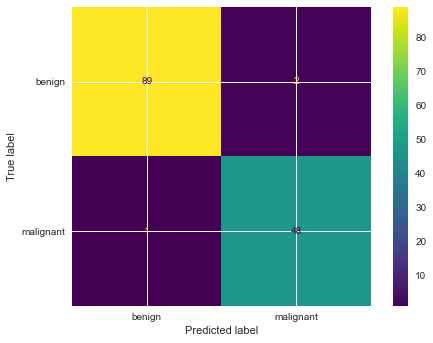

In [83]:
plot_confusion_matrix(cancer_grid_mlp, cancer_X_test, cancer_y_test)

## Veículos

In [84]:
car_models.sort_values(by=['Accuracy'], ascending=False)

,Params,Accuracy
svm_grid_search,"{'C': 50, 'degree': 1}",0.670588
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",0.670588
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",0.670588
rf_grid_search,"{'n_estimators': 100, 'max_depth': 5}",0.670588
mlp_grid_search,"{'size': (100,), 'alpha': 0.0001}",0.558824
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",0.529412
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",0.529412
svm_hold_out,"{'C': 1.0, 'degree': 3}",0.470588
svm_cross_val,"{'C': 1.0, 'degree': 3}",0.470588
knn,{'k': 1},0.435294


In [89]:
confusion_matrix(car_y_test, car_grid_svc.predict(car_X_test))

array([[31,  2,  1,  0],
       [ 4, 22, 23,  5],
       [ 8,  9, 22,  2],
       [ 1,  1,  0, 39]])

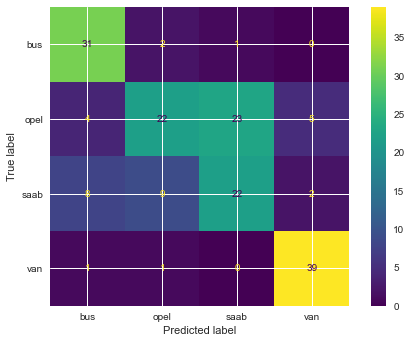

In [91]:
plot_confusion_matrix(car_grid_svc, car_X_test, car_y_test)

## Previsão do tempo

In [92]:
weather_models.sort_values(by=['Accuracy'], ascending=False)

,Params,Accuracy
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",1.0
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",1.0
mlp_grid_search,"{'size': (50, 50, 50), 'alpha': 0.0001}",1.0
svm_hold_out,"{'C': 1.0, 'degree': 3}",1.0
svm_cross_val,"{'C': 1.0, 'degree': 3}",1.0
svm_grid_search,"{'C': 2.0, 'degree': 1}",1.0
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",1.0
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",1.0
rf_grid_search,"{'n_estimators': 10, 'max_depth': 2}",1.0
knn,{'k': 1},1.0


In [93]:
confusion_matrix(weather_y_test, weather_mlp.predict(weather_X_test))

array([[4, 0],
       [0, 4]])

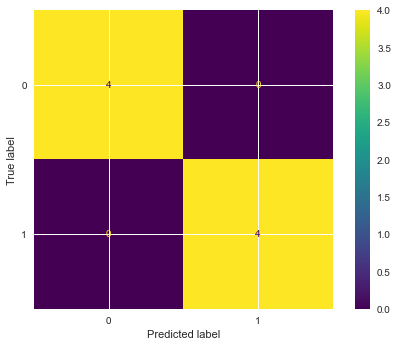

In [94]:
plot_confusion_matrix(weather_mlp, weather_X_test, weather_y_test)

## Imposto de Renda

In [95]:
ir_models.sort_values(by=['Accuracy'], ascending=False)

,Params,Accuracy
knn,{'k': 1},1.0
svm_grid_search,"{'C': 3.0, 'degree': 1}",0.7
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",0.7
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",0.7
rf_grid_search,"{'n_estimators': 10, 'max_depth': 4}",0.7
svm_hold_out,"{'C': 1.0, 'degree': 3}",0.6
svm_cross_val,"{'C': 1.0, 'degree': 3}",0.6
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",0.3
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",0.3
mlp_grid_search,"{'size': (50, 50, 50), 'alpha': 0.0001}",0.2


In [97]:
confusion_matrix(ir_y_test, ir_knn.predict(ir_X_test))

array([[5, 0, 0],
       [0, 3, 0],
       [0, 0, 2]])

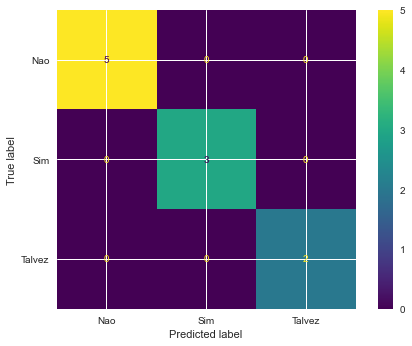

In [99]:
plot_confusion_matrix(ir_knn, ir_X_test, ir_y_test)

## Diabetes

In [100]:
diabetes_models.sort_values(by=['Accuracy'], ascending=False)

,Params,Accuracy
svm_grid_search,"{'C': 5.0, 'degree': 1}",0.766234
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",0.766234
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",0.766234
rf_grid_search,"{'n_estimators': 500, 'max_depth': 5}",0.766234
mlp_grid_search,"{'size': (100,), 'alpha': 0.05}",0.720779
knn,{'k': 5},0.714286
svm_hold_out,"{'C': 1.0, 'degree': 3}",0.701299
svm_cross_val,"{'C': 1.0, 'degree': 3}",0.701299
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",0.649351
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",0.649351


In [101]:
confusion_matrix(diabetes_y_test, diabetes_grid_svc.predict(diabetes_X_test))

array([[90, 12],
       [24, 28]])

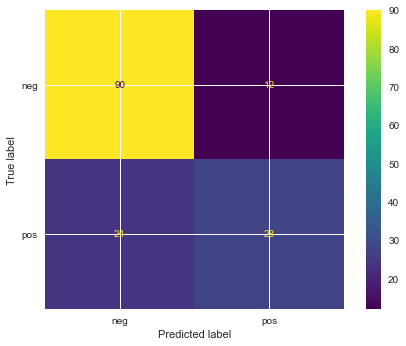

In [102]:
plot_confusion_matrix(diabetes_grid_svc, diabetes_X_test, diabetes_y_test)

## Banco

In [103]:
bank_models.sort_values(by=['Accuracy'], ascending=False)

,Params,Accuracy
mlp_grid_search,"{'size': (1, 5, 10), 'alpha': 0.0001}",0.85
svm_hold_out,"{'C': 1.0, 'degree': 3}",0.85
svm_cross_val,"{'C': 1.0, 'degree': 3}",0.85
svm_grid_search,"{'C': 2.0, 'degree': 1}",0.85
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",0.85
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",0.85
rf_grid_search,"{'n_estimators': 10, 'max_depth': 5}",0.85
knn,{'k': 7},0.85
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",0.683333
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",0.683333


In [104]:
confusion_matrix(bank_y_test, bank_grid_mlp.predict(bank_X_test))

array([[51,  0],
       [ 9,  0]])

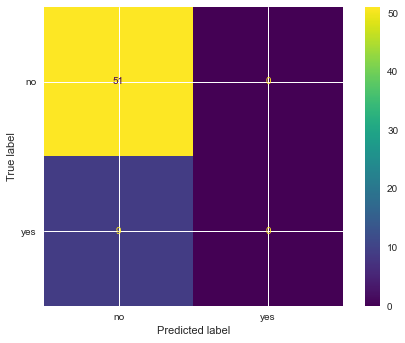

In [105]:
plot_confusion_matrix(bank_grid_mlp, bank_X_test, bank_y_test)